![insomnia](insomnia.jpg)


# SleepInc: Helping you find better sleep 😴(especially for nurses, teachers, and managers. )

## 📖 Background

Your client is SleepInc, a sleep health company that recently launched a sleep-tracking app called SleepScope. The app monitors sleep patterns and collects users' self-reported data on lifestyle habits. SleepInc wants to identify lifestyle, health, and demographic factors that strongly correlate with poor sleep quality. They need your help to produce visualizations and a summary of findings for their next board meeting! They need these to be easily digestible for a non-technical audience!

## 💾 The data

SleepInc has provided you with an anonymized dataset of sleep and lifestyle metrics for 374 individuals. This dataset contains average values for each person calculated over the past six months.

The dataset includes 13 columns covering sleep duration, quality, disorders, exercise, stress, diet, demographics, and other factors related to sleep health. 

| Column | Description |
|---------|----------------------------------------|  
| `Person ID` | An identifier for each individual. |
| `Gender` | The gender of the person (Male/Female). |  
| `Age` | The age of the person in years. |
| `Occupation` | The occupation or profession of the person. |
| `Sleep Duration (hours)` | The average number of hours the person sleeps per day. |
| `Quality of Sleep (scale: 1-10)` | A subjective rating of the quality of sleep, ranging from 1 to 10. |
| `Physical Activity Level (minutes/day)` | The average number of minutes the person engages in physical activity daily. |  
| `Stress Level (scale: 1-10)` | A subjective rating of the stress level experienced by the person, ranging from 1 to 10. |
| `BMI Category` | The BMI category of the person (e.g., Underweight, Normal, Overweight). |
| `Blood Pressure (systolic/diastolic)` | The average blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure. |
| `Heart Rate (bpm)` | The average resting heart rate of the person in beats per minute. |
| `Daily Steps` | The average number of steps the person takes per day. |
| `Sleep Disorder` | The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea). |

***Acknowledgments**: Laksika Tharmalingam, Kaggle: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset* (this is a fictitious dataset)

In [2]:
import pandas as pd
sleep_data = pd.read_csv('sleep_health_data.csv')
sleep_data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


## 💪 Challenge

Leverage this sleep data to analyze the relationship between lifestyle, health, demographic factors, and sleep quality. Your goal is to identify factors that correlate with poor sleep health.

Some examples:

- Examine relationships between several factors like gender, occupation, physical activity, stress levels, and sleep quality/duration. Create visualizations to present your findings.
- Produce recommendations on ways people can improve sleep health based on the patterns in the data.
- Develop an accessible summary of study findings and recommendations for improving sleep health for non-technical audiences.

# Step 2: Checking for Missing Values and Duplicates
- This code checks for missing values in each column and counts duplicate entries based on the 'Person ID'.

In [3]:
# Checking for missing values
missing_values = sleep_data.isnull().sum()

# Checking for duplicates based on Person ID
duplicate_entries = sleep_data.duplicated(subset='Person ID').sum()
print(missing_values)
print(duplicate_entries)

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64
0


# Step 3: Exploratory Data Analysis - Visualizations 探索式資料分析
- This block of code uses matplotlib and seaborn for visualizing different aspects of the dataset, such as the distribution of age, sleep duration, gender, BMI category, quality of sleep, and stress level.

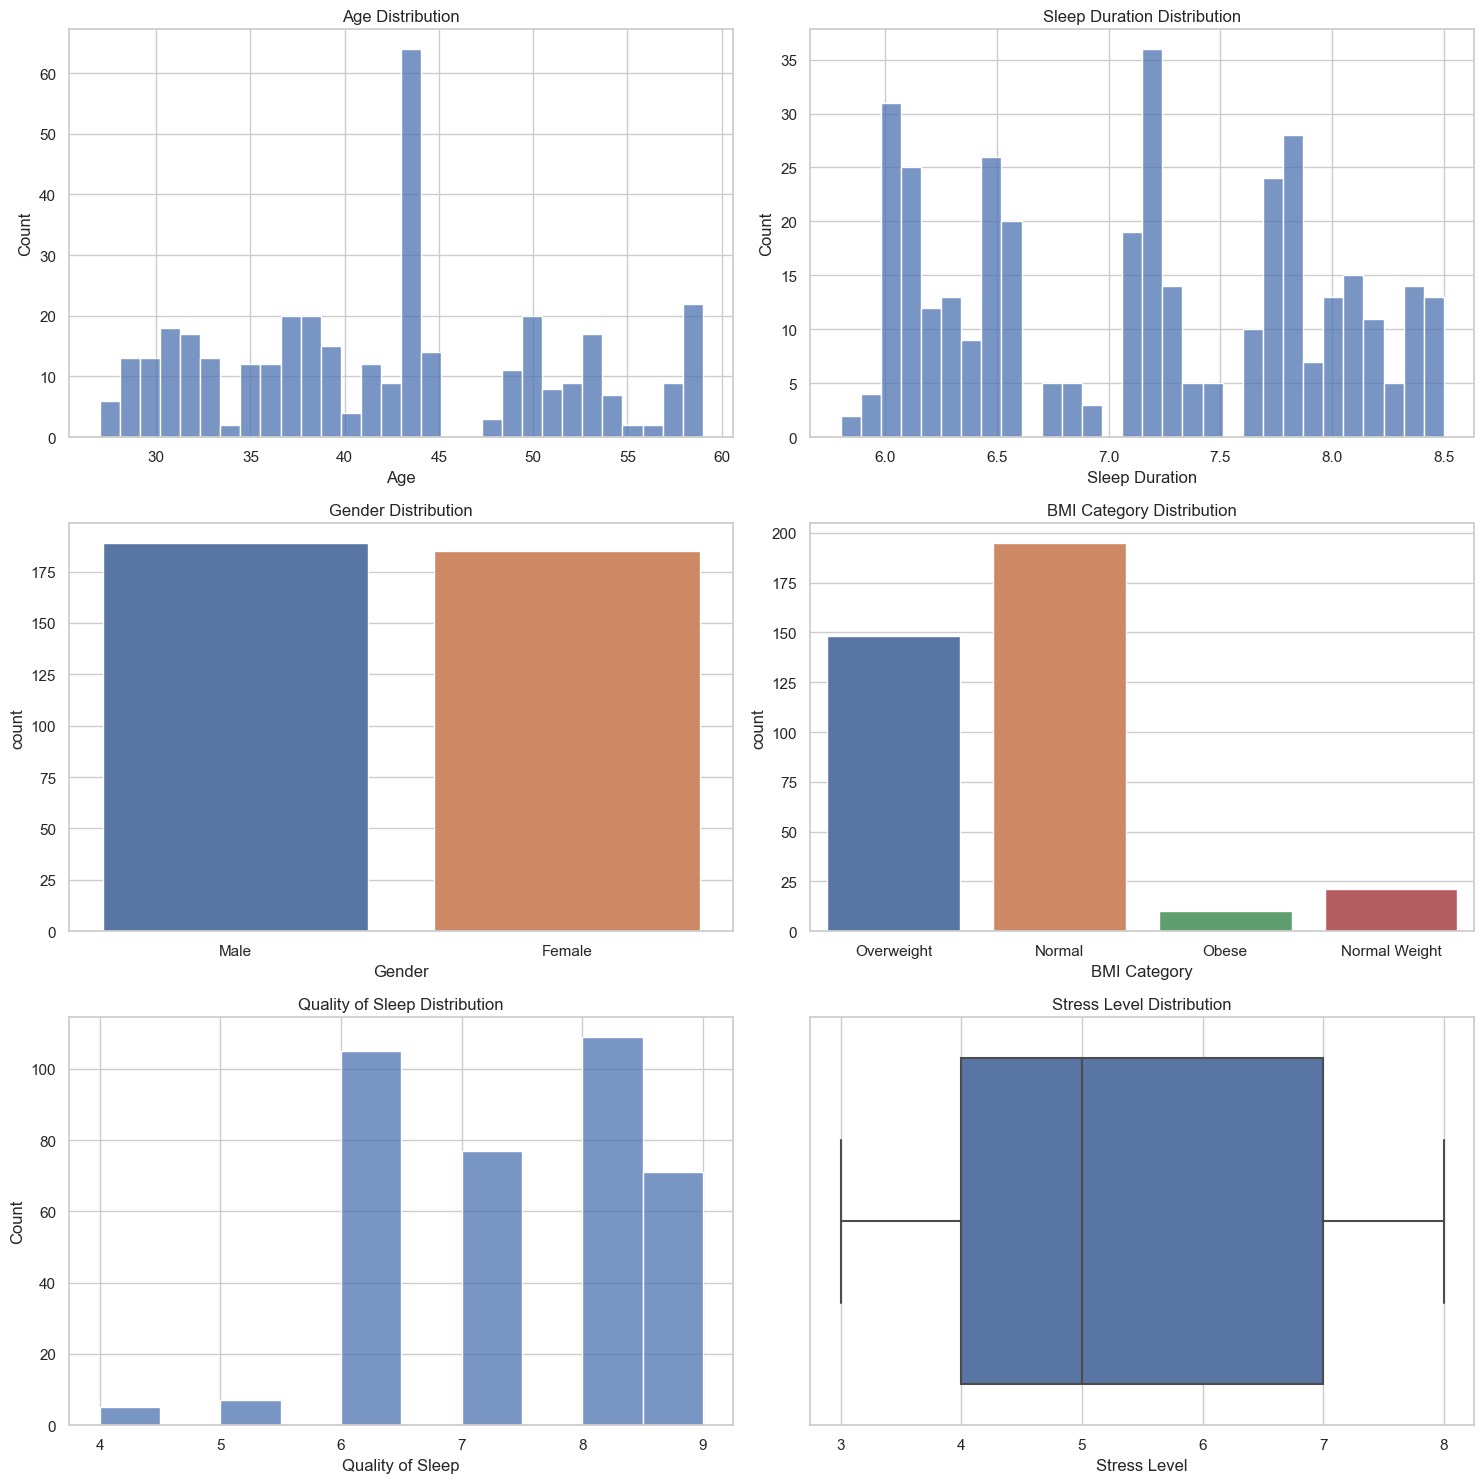

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating subplots for different variables
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Histogram of Age 年齡直方圖
sns.histplot(sleep_data['Age'], bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

# Histogram of Sleep Duration 睡眠持續時間直方圖
sns.histplot(sleep_data['Sleep Duration'], bins=30, ax=axes[0, 1])
axes[0, 1].set_title('Sleep Duration Distribution')

# Count plot of Gender 性別分布統計圖
sns.countplot(x='Gender', data=sleep_data, ax=axes[1, 0])
axes[1, 0].set_title('Gender Distribution')

# Count plot of BMI Category BMI類別分布統計圖
sns.countplot(x='BMI Category', data=sleep_data, ax=axes[1, 1])
axes[1, 1].set_title('BMI Category Distribution')

# Histogram of Quality of Sleep 睡眠品質直方圖
sns.histplot(sleep_data['Quality of Sleep'], bins=10, ax=axes[2, 0])
axes[2, 0].set_title('Quality of Sleep Distribution')

# Boxplot for Stress Level 壓力水平箱形圖
sns.boxplot(x='Stress Level', data=sleep_data, ax=axes[2, 1])
axes[2, 1].set_title('Stress Level Distribution')

plt.tight_layout()
plt.show()

In [17]:
unique_Occupation = sleep_data['Occupation'].unique()
unique_BMI_Category = sleep_data['BMI Category'].unique()
print(unique_Occupation)
print(unique_BMI_Category)

['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
['Overweight' 'Normal' 'Obese' 'Normal Weight']


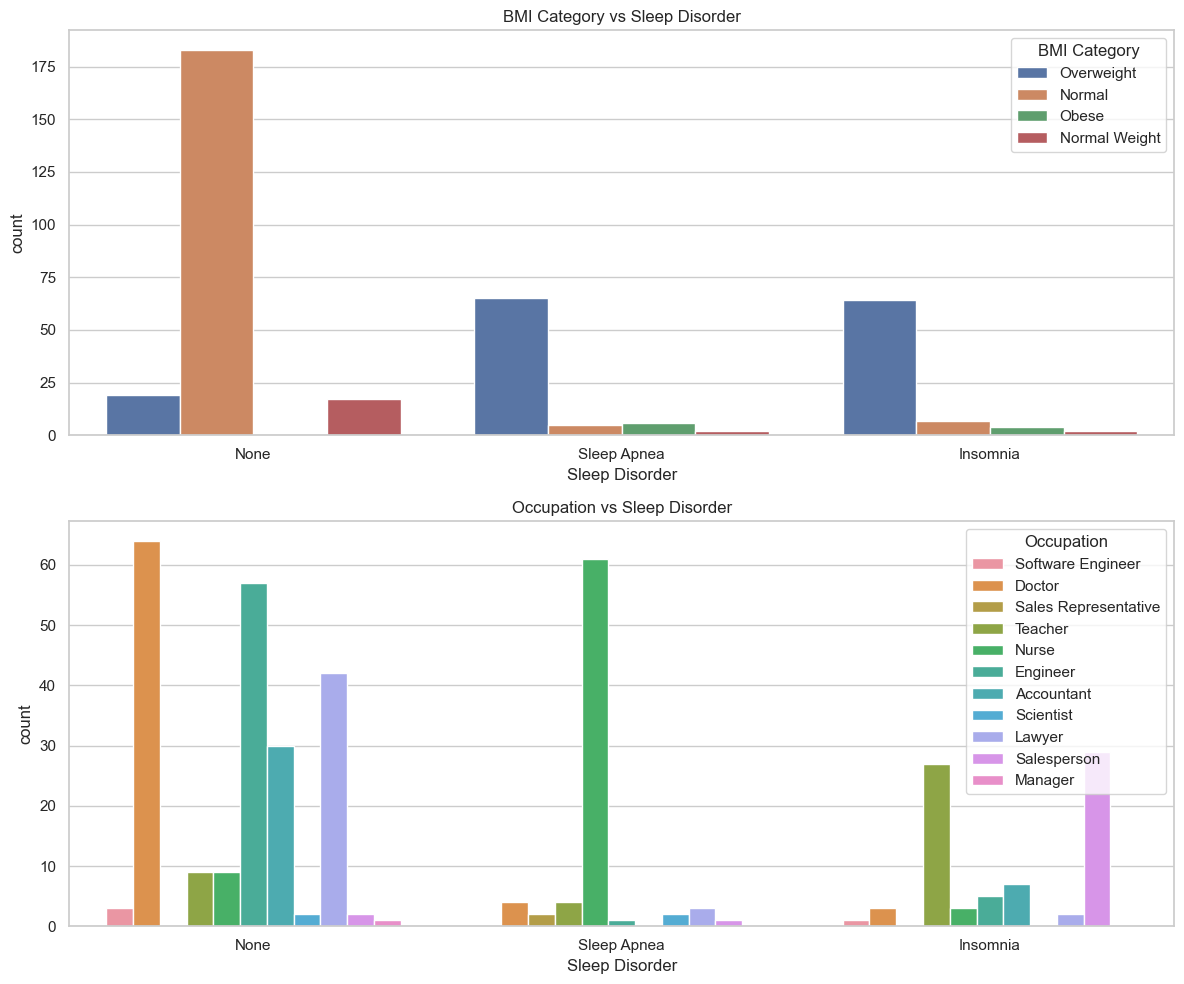

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Creating visualizations to examine relationships between various factors and Sleep Disorder

fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Relationship between BMI Category and Sleep Disorder
sns.countplot(ax=axes[0], x='Sleep Disorder', hue='BMI Category', data=sleep_data)
axes[0].set_title('BMI Category vs Sleep Disorder')

# Relationship between Occupation and Sleep Disorder
sns.countplot(ax=axes[1], x='Sleep Disorder', hue='Occupation', data=sleep_data)
axes[1].set_title('Occupation vs Sleep Disorder')
axes[1].tick_params(axis='x')

# Adjusting layout
plt.tight_layout()
plt.show()

# Step 4: Correlation Analysis and Further Visualizations

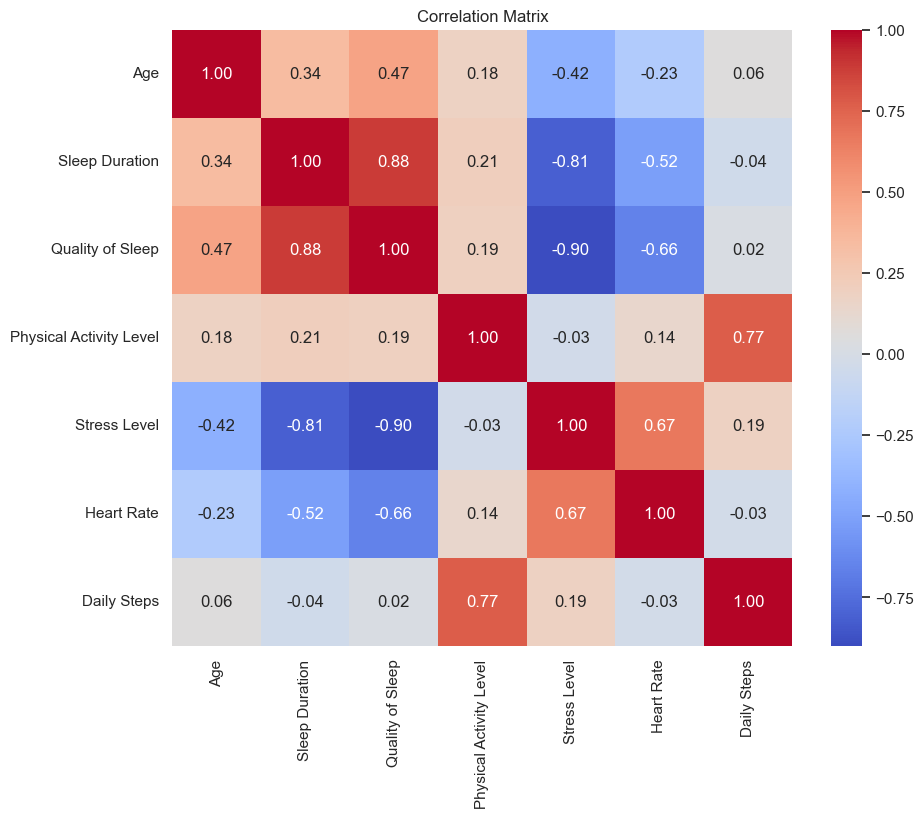

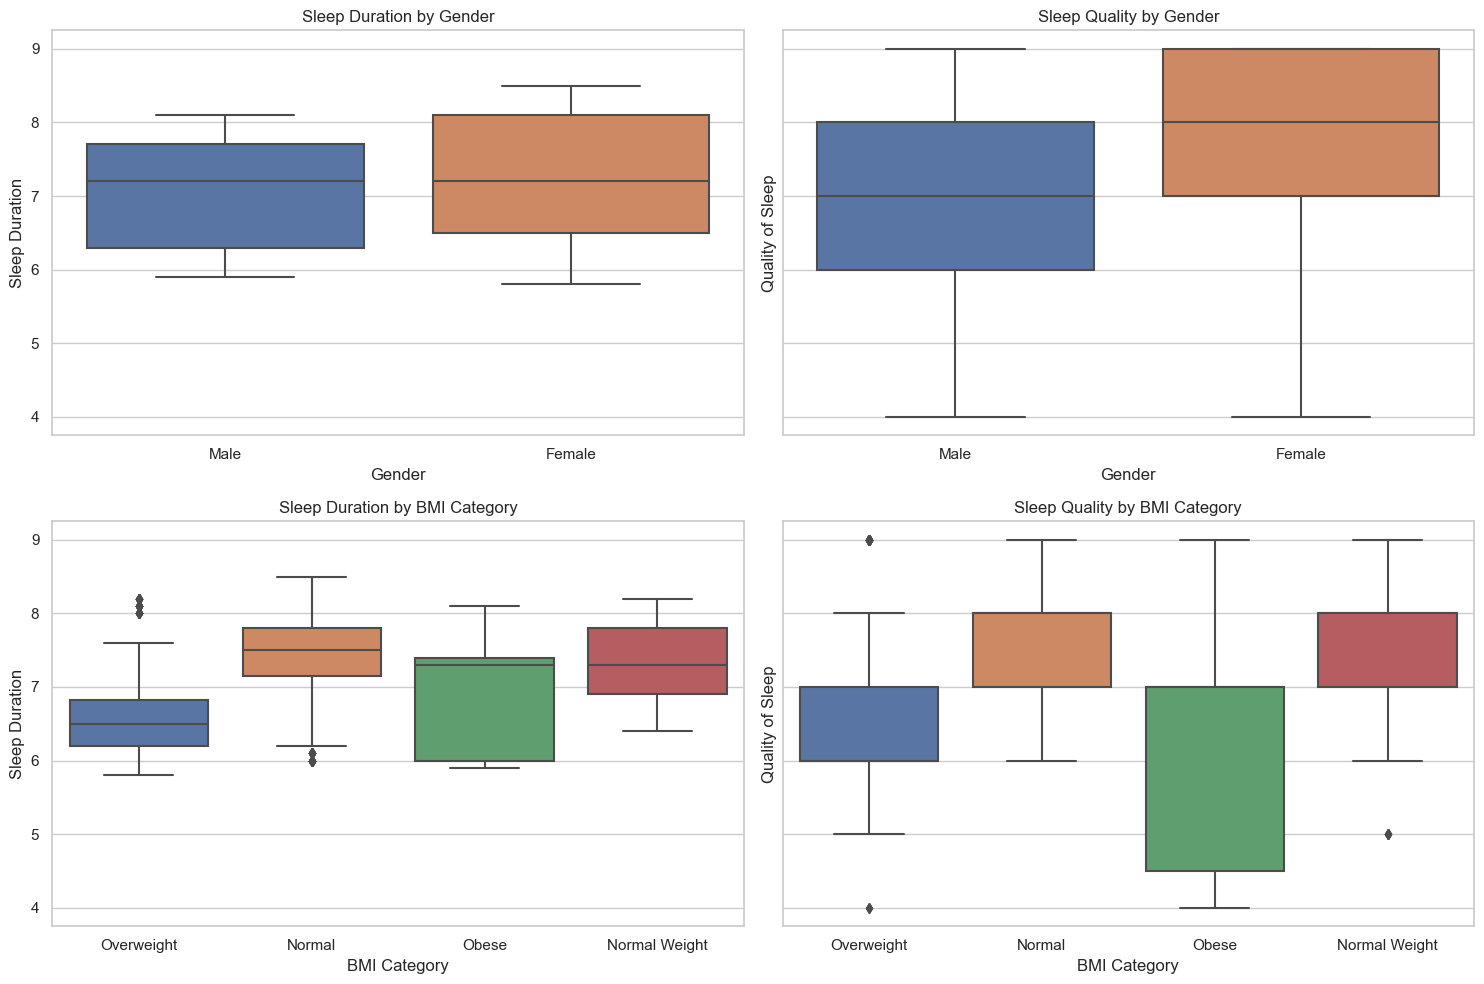

In [64]:
# Correlation matrix focusing on sleep health indicators and lifestyle factors
correlation_columns = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
                       'Stress Level', 'Heart Rate', 'Daily Steps']
correlation_matrix = sleep_data[correlation_columns].corr()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Additionally, examining sleep duration and quality by Gender and BMI category
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), sharey=True)

# Sleep Duration by Gender
sns.boxplot(x='Gender', y='Sleep Duration', data=sleep_data, ax=axes[0, 0])
axes[0, 0].set_title('Sleep Duration by Gender')

# Sleep Quality by Gender
sns.boxplot(x='Gender', y='Quality of Sleep', data=sleep_data, ax=axes[0, 1])
axes[0, 1].set_title('Sleep Quality by Gender')

# Sleep Duration by BMI Category
sns.boxplot(x='BMI Category', y='Sleep Duration', data=sleep_data, ax=axes[1, 0])
axes[1, 0].set_title('Sleep Duration by BMI Category')

# Sleep Quality by BMI Category
sns.boxplot(x='BMI Category', y='Quality of Sleep', data=sleep_data, ax=axes[1, 1])
axes[1, 1].set_title('Sleep Quality by BMI Category')

plt.tight_layout()
plt.show()

# Recommendations Based on Findings
- Manage Stress: As stress negatively impacts sleep quality, stress management techniques like mindfulness, meditation, or counseling could be beneficial. 
- 由於壓力對睡眠品質有負面影響，採用如正念、冥想或諮詢等壓力管理技巧可能會有所幫助。
- ---------------------------------------------------------------------------------------------
- Increase Physical Activity: Engaging in regular physical activity can improve sleep quality. This doesn't necessarily mean intense workouts; even daily walking or moderate exercise can help.
- 進行規律的體力活動可以改善睡眠品質。這並不一定意味著要進行劇烈的鍛煉；即使是每天散步或適度運動也能有所幫助
- - ---------------------------------------------------------------------------------------------
- BMI Management: Those in the 'Obese' BMI category tend to have poorer sleep quality. Weight management through diet and exercise could improve sleep health.
- BMI 管理：處於「肥胖」BMI 範疇的人往往睡眠品質較差。通過飲食和運動進行體重管理可能改善睡眠健康。
- - ---------------------------------------------------------------------------------------------

# Summary for Non-Technical Audiences
- **Stress is a Sleep Disruptor**: High stress can make your sleep worse. Finding ways to relax and manage stress can lead to better sleep.
- **Move More, Sleep Better**: Regular exercise or even just daily walking can improve how well you sleep.
- **Weight Matters**: Being overweight can affect your sleep. A balanced diet and regular exercise can help improve sleep quality.
- Everyone's Different: While everyone's sleep needs are unique, paying attention to your **stress levels, physical activity, and weight** can generally help improve your sleep.
- -------------------------------------------------------------------------------------------
### For Nurses (Most prevalent with Sleep Apnea):
1. Improve Sleep Environment: Ensure a quiet, dark environment with a comfortable temperature to enhance sleep quality.
2. Regular Sleep Patterns: Try to maintain regular sleep hours, especially between night and morning shifts, to ensure adequate rest.
3. Weight Management: If overweight, healthy diet and exercise can help reduce weight, which may alleviate symptoms of sleep apnea.
4. Avoid Alcohol and Sedatives: These substances can exacerbate sleep apnea.
### For Teachers and Managers (Most prevalent with Insomnia):
1. Reduce Work Stress: Attempt to separate work and personal life to lessen the impact of work stress on sleep.
2. Relaxation Techniques: Practices such as meditation, yoga, or other relaxation techniques can help reduce stress and anxiety.
3. Regular Exercise: Moderate daily exercise can improve sleep quality, but avoid intense workouts before bedtime.
4. Bedtime Routine: Establish a consistent pre-sleep routine, like reading or a relaxing activity, to prepare the body and mind for sleep.

-------------------------------------------------------------------------------------------------
## Summary for Non-Technical Audiences 非資料科學家
- **壓力是干擾睡眠的因素**：高壓力可能會惡化睡眠質量。找到放鬆和管理壓力的方法可以帶來更好的睡眠。
- **多運動，睡得更好**：規律運動，甚至每天散步，都能改善睡眠質量
- **體重很重要**：超重可能影響睡眠。均衡的飲食和規律運動有助於改善睡眠品質。
- **每個人都不同**：雖然每個人的睡眠需求都是獨一無二的，但關注壓力水平、體力活動和體重通常有助於改善睡眠。

### 對於護士（睡眠呼吸暫停 Sleep Apnea 最多）：
1. 改善睡眠環境：確保睡眠環境安靜、黑暗，並適當調節溫度，有助於改善睡眠品質。
2. 規律作息：儘量保持規律的作息時間，尤其是夜班和早班之間，保持充足的休息。
3. 減少體重：如果超重或肥胖，通過健康飲食和適量運動減輕體重，這可能有助於減少睡眠呼吸暫停的症狀。
4. 避免酒精和鎮靜劑：這些物質可能會加重睡眠呼吸暫停的情況。
### 對於教師和經理（失眠 Insomnia 最多）：
1. 減少工作壓力：嘗試將工作和私人生活分開，避免在家中處理工作相關事務，以減少工作壓力對睡眠的影響。
2. 放鬆心情：可以通過冥想、瑜伽或其他放鬆技巧來減輕壓力和焦慮。
3. 規律運動：適度的日常運動可以幫助改善睡眠品質，但應避免在睡前進行劇烈運動。
4. 睡前例行程序：建立固定的睡前例行程序，如閱讀或輕鬆的活動，以幫助身體和大腦準備進入睡眠狀態。

#  The following are the decision tree classifications: __決策樹__

In [31]:
# Splitting 'Blood Pressure' into 'Systolic BP' and 'Diastolic BP'
sleep_data[['Systolic BP', 'Diastolic BP']] = sleep_data['Blood Pressure'].str.split('/', expand=True).astype(int)

# Dropping irrelevant columns 'Person ID' and 'Occupation'
sleep_data_modified = sleep_data.drop(['Person ID', 'Occupation', 'Blood Pressure'], axis=1)
sleep_data_modified

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,Male,27,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
370,Female,59,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
371,Female,59,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
372,Female,59,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95


In [30]:
unique_genders = sleep_data['Gender'].unique()
unique_sleep_disorders = sleep_data['Sleep Disorder'].unique()
unique_sleep_BMICategory = sleep_data['BMI Category'].unique()
unique_genders, unique_sleep_disorders ,unique_sleep_BMICategory

(array(['Male', 'Female'], dtype=object),
 array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object),
 array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object))

In [32]:
# Manually defining the mappings
gender_mapping_manual = {'Male': 1, 'Female': 0}
sleep_disorder_mapping_manual = {'None': 0, 'Insomnia': 1, 'Sleep Apnea': 2}
BMICategory_mapping_manual = {'Overweight': 0, 'Normal': 1,'Normal Weight': 1 , 'Obese': 2}
# Applying the mappings to the dataset
sleep_data_modified['Gender'] = sleep_data_modified['Gender'].map(gender_mapping_manual)
sleep_data_modified['Sleep Disorder'] = sleep_data_modified['Sleep Disorder'].map(sleep_disorder_mapping_manual)
sleep_data_modified['BMI Category'] = sleep_data_modified['BMI Category'].map(BMICategory_mapping_manual)
# Displaying the first few rows to confirm the changes
sleep_data_modified.head()


,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,1,27,6.1,6,42,6,0,77,4200,0,126,83
1,1,28,6.2,6,60,8,1,75,10000,0,125,80
2,1,28,6.2,6,60,8,1,75,10000,0,125,80
3,1,28,5.9,4,30,8,2,85,3000,2,140,90
4,1,28,5.9,4,30,8,2,85,3000,2,140,90


In [36]:
pip install dtreeviz

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [37]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import dtreeviz

In [38]:
# Preparing the data for the decision tree model
X = sleep_data_modified.drop('Sleep Disorder', axis=1)
y = sleep_data_modified['Sleep Disorder']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating and training the decision tree model
decision_tree = DecisionTreeClassifier( max_depth = 3, random_state=42)
decision_tree.fit(X_train, y_train)

# Predicting on the test set
y_pred = decision_tree.predict(X_test)

# Evaluating the model
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

# Printing the evaluation results
print(classification_report_result)
print(confusion_matrix_result)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        62
           1       0.77      0.83      0.80        24
           2       0.91      0.74      0.82        27

    accuracy                           0.89       113
   macro avg       0.87      0.85      0.86       113
weighted avg       0.90      0.89      0.89       113

[[61  1  0]
 [ 2 20  2]
 [ 2  5 20]]


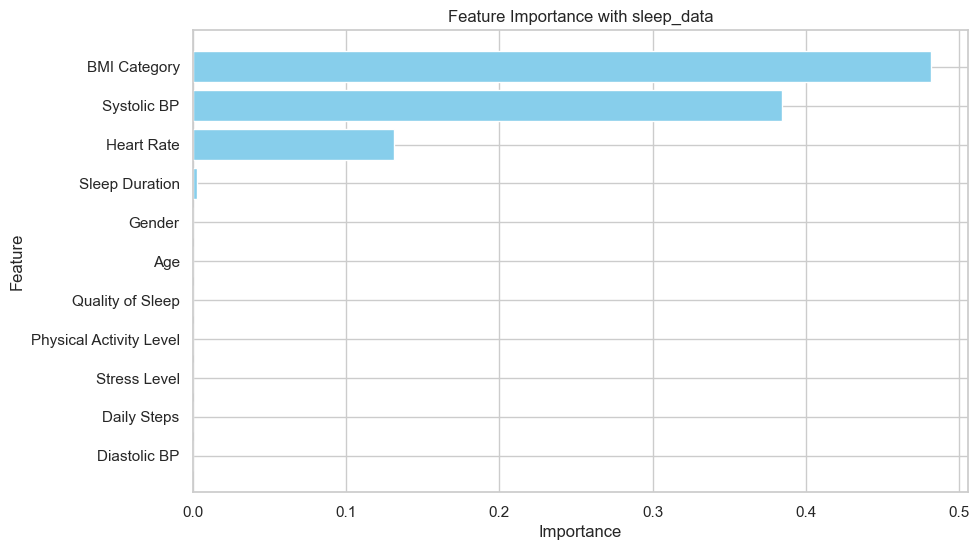

In [39]:
# 獲取特徵重要性
feature_importances = decision_tree.feature_importances_

# 將特徵名稱和其重要性結合成一個 DataFrame
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# 排序顯示重要性
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df

# Create a dataframe for visualization
features_df_sleep_data = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(features_df_sleep_data['Feature'],features_df_sleep_data['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance with sleep_data')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

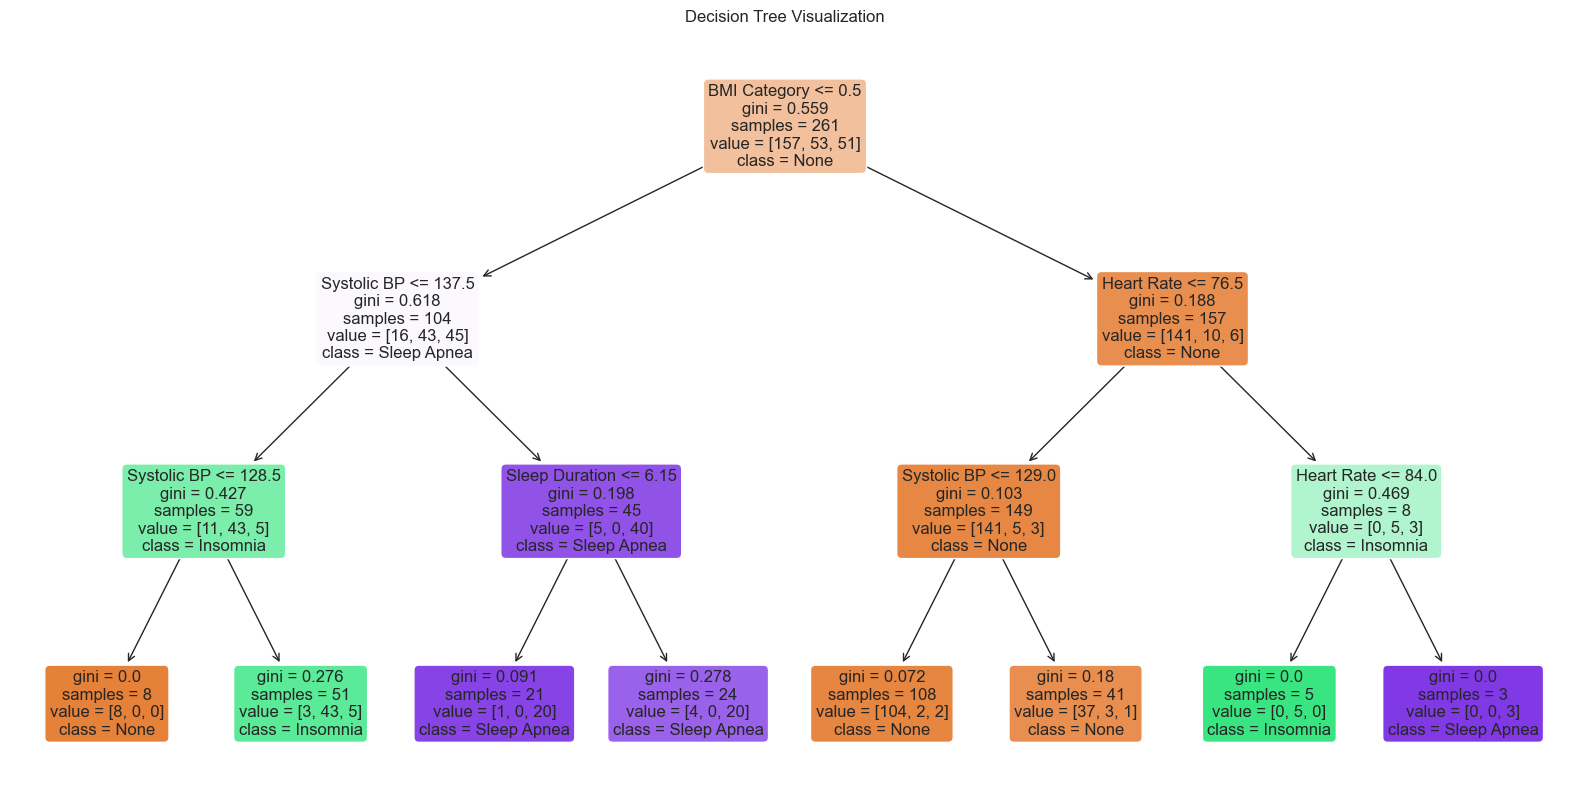

In [40]:
from sklearn.tree import plot_tree
# Plotting the decision tree
plt.figure(figsize=(20,10))
tree_plot = plot_tree(decision_tree, 
                      feature_names=X.columns, 
                      class_names=['None', 'Insomnia', 'Sleep Apnea'],
                      filled=True, rounded=True, 
                      fontsize=12)
plt.title("Decision Tree Visualization")
plt.show()

Error: no "view" mailcap rules found for type "image/svg+xml"
/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening '/tmp/DTreeViz_207.svg'


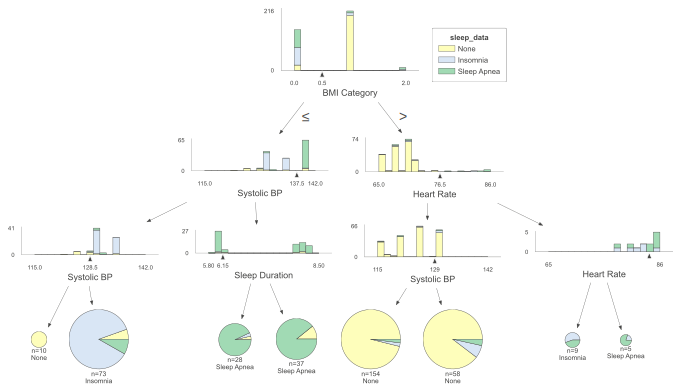

In [41]:
viz_model = dtreeviz.model(decision_tree,
                           X_train=X, y_train=y,
                          feature_names=X.columns,                
                           target_name='sleep_data',
                           class_names=['None', 'Insomnia', 'Sleep Apnea'])
v = viz_model.view()     # render as SVG into internal object 
v.show()                 # pop up window
viz_model.view()  